In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("hasil_TextPreProcessing_sevima.csv")

In [3]:
print(data.columns)

Index(['content', 'score', 'Label', 'text_clean', 'text_StopWord',
       'text_tokens', 'text_steamindo'],
      dtype='object')


In [4]:
# Menghapus kolom yang tidak diperlukan dan mengganti nama kolom
data = data[['content', 'score', 'Label', 'text_clean']]  # Pertahankan hanya kolom yang dibutuhkan
data.rename(columns={'Label': 'label'}, inplace=True)  # Ganti nama kolom "Label" menjadi "label"
data.rename(columns={'text_clean': 'txt'}, inplace=True)
# Tampilkan DataFrame setelah penyesuaian
print(data.head())

                                             content  score    label  \
0  Bintang 5 jika sevima menyediakan mode gelap d...      4  Positif   
1                        Tidak bisa masuk mulu berak      1  Negatif   
2  Izin melapor ketua aplikasi ngebug jaringan pa...      1  Negatif   
3  Ko saya ganti HP jadi G ada notif tugas atau k...      2  Negatif   
4  membantu banget buat liat nilai nilai semester...      5  Positif   

                                                 txt  
0  bintang  jika sevima menyediakan mode gelap di...  
1                        tidak bisa masuk mulu berak  
2  izin melapor ketua aplikasi ngebug jaringan pa...  
3  ko saya ganti hp jadi g ada notif tugas atau k...  
4  membantu banget buat liat nilai nilai semester...  


In [21]:
# Simpan DataFrame yang telah diubah ke file CSV
data.to_csv('data_cleaned.csv', index=False, encoding='utf-8')

# Konfirmasi penyimpanan
print("File CSV berhasil disimpan dengan nama 'data_cleaned.csv'")

File CSV berhasil disimpan dengan nama 'data_cleaned.csv'


In [5]:
# Preprocessing teks
max_features = 1000  # Jumlah kata unik yang akan digunakan
tokenizer = Tokenizer(num_words=max_features, split=" ")
tokenizer.fit_on_texts(data["txt"].values)
X = tokenizer.texts_to_sequences(data["txt"].values)
X = pad_sequences(X)

In [6]:
# Preprocessing label
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(data["label"])

In [8]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Periksa bentuk data
print(X_train.shape, X_test.shape)
print(len(y_train), len(y_test))

(704, 73) (177, 73)
704 177


In [10]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Periksa distribusi label pada data uji
print("Jumlah label 0 di y_test:", sum(y_test == 0))
print("Jumlah label 1 di y_test:", sum(y_test == 1))

Jumlah label 0 di y_test: 112
Jumlah label 1 di y_test: 65


In [14]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verifikasi bentuk data
print("Bentuk X_train:", X_train.shape)
print("Bentuk Y_train:", Y_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk Y_test:", Y_test.shape)


Bentuk X_train: (704, 73)
Bentuk Y_train: (704,)
Bentuk X_test: (177, 73)
Bentuk Y_test: (177,)


In [15]:
embedding_dim = 256
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embedding_dim))  # Hapus input_length
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [16]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=8, 
                           verbose=1, 
                           restore_best_weights=True)

In [17]:

# Training model
batch_size = 64
epochs = 50
history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
    )

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.5900 - loss: 0.6813 - val_accuracy: 0.6328 - val_loss: 0.6143
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6751 - loss: 0.6008 - val_accuracy: 0.7910 - val_loss: 0.5184
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7861 - loss: 0.5114 - val_accuracy: 0.8249 - val_loss: 0.4422
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8135 - loss: 0.4292 - val_accuracy: 0.8362 - val_loss: 0.4354
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8646 - loss: 0.3158 - val_accuracy: 0.8192 - val_loss: 0.4542
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8998 - loss: 0.2461 - val_accuracy: 0.8192 - val_loss: 0.4763
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9134 - loss: 0.2284 - val_accuracy: 0.8362 - val_loss: 0.6001
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9238 - loss: 0.2346 - val_accuracy: 0.8079 - 

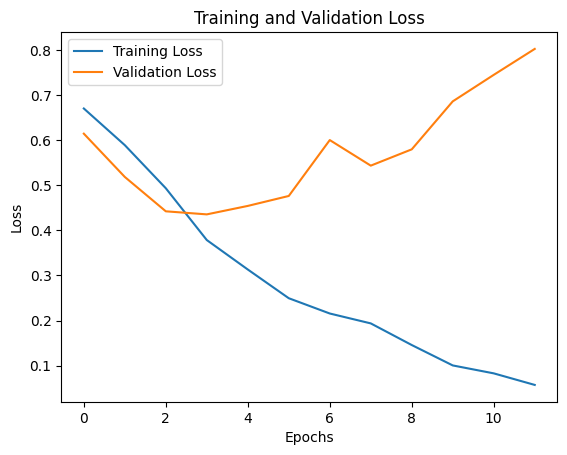

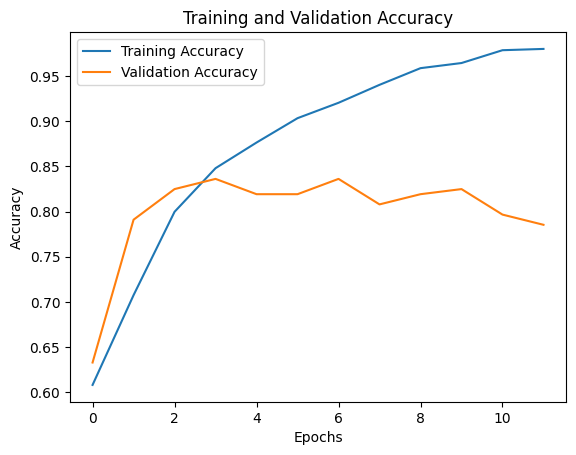

In [18]:
# Visualisasi Loss dan Akurasi
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8304 - loss: 0.4187
Loss: 0.43543514609336853
Accuracy: 0.8361582159996033


In [20]:
import os
import json

# Buat folder jika belum ada
if not os.path.exists("model"):
    os.makedirs("model")

# Simpan riwayat pelatihan ke file JSON
with open("model/training_history.json", "w") as file:
    json.dump(history.history, file)

# Simpan model ke file
model.save("model/saved_model.keras")
model.save_weights("model/model_weights.weights.h5")